# **Project Name**    -  Brain Tumor MRI Image Classification



##### **Project Type**    - Classification
##### **Contribution**    - Individual
##### **Team Member -**  Shubham Pandey

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Shubhampandey1git/Brain-Tumor-MRI-Image-Classification

# **Problem Statement**


**This project aims to develop a deep learning-based solution for classifying brain MRI images into multiple categories according to tumor type. It involves building a custom CNN model from scratch and enhancing performance through transfer learning using pretrained models. The project also includes deploying a user-friendly Streamlit web application to enable real-time tumor type predictions from uploaded MRI images.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [2]:
# Import Libraries
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

### Dataset Loading

In [3]:
# Load Dataset
# Parameters for loader
batch_size = 32
img_height = 180
img_width = 180

# Training data
train_ds = tf.keras.utils.image_dataset_from_directory(
  "Tumour/train/",
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Validation Data
val_ds = tf.keras.utils.image_dataset_from_directory(
  "Tumour/valid/",
  image_size=(img_height, img_width),
  batch_size=batch_size)

# Test Data
test_ds = tf.keras.utils.image_dataset_from_directory(
  "Tumour/test/",
  image_size=(img_height, img_width),
  batch_size=batch_size)


Found 1695 files belonging to 4 classes.
Found 502 files belonging to 4 classes.
Found 246 files belonging to 4 classes.


### Dataset First View

In [4]:
# Dataset First Look
class_names = train_ds.class_names
print(class_names)

for img, labels in train_ds.take(1):
    print(img.shape)
    print(labels.numpy())

['glioma', 'meningioma', 'no_tumor', 'pituitary']
(32, 180, 180, 3)
[0 2 3 0 0 0 0 3 3 0 1 3 3 2 0 3 1 2 0 0 0 2 1 1 2 0 1 2 1 3 2 1]


### Dataset Rows & Columns count

In [5]:
# Dataset Rows & Columns count
# No of rows
num_images = 0
for batch in train_ds:
    images, labels = batch
    num_images += images.shape[0]
print(f"Total images in train_ds: {num_images}")

# No of columns
for images, labels in train_ds.take(1):
    print(f"Image shape: {images.shape}")  # (batch_size, height, width, channels)
    print(f"Label shape: {labels.shape}")  # (batch_size,)


Total images in train_ds: 1695
Image shape: (32, 180, 180, 3)
Label shape: (32,)


### Dataset Information

In [6]:
# Dataset Info
class_names = train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'no_tumor', 'pituitary']


#### Duplicate Values

In [7]:
# Dataset Duplicate Value Count
import imagehash

def get_image_hashes(folder):
    hashes = {}
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith('.jpg') or file.endswith('.png'):
                path = os.path.join(root, file)
                img = PIL.Image.open(path).resize((128, 128)).convert("L")
                hash_val = imagehash.average_hash(img)
                if hash_val in hashes:
                    hashes[hash_val].append(path)
                else:
                    hashes[hash_val] = [path]
    return hashes

hashes = get_image_hashes("Tumour/")
duplicates = {k: v for k, v in hashes.items() if len(v) > 1}
print(len(duplicates))
for h, paths in duplicates.items():
    print(f"Duplicate hash {h}:")
    for p in paths:
        print(f"  {p}")

300
Duplicate hash 183c7e7e7e7e7c20:
  Tumour/test\glioma\Tr-gl_0018_jpg.rf.7a670766b8083a1b516a49e241a636bc.jpg
  Tumour/train\meningioma\Tr-me_0068_jpg.rf.f2f182526fa194a7ee52c9b6037dd1e6.jpg
Duplicate hash 001c3c7e7e7e3c18:
  Tumour/test\glioma\Tr-gl_0042_jpg.rf.c825249fca17c0579976c6455ed0f64d.jpg
  Tumour/train\glioma\Tr-gl_0357_jpg.rf.385fe812bfda76a574dfd66316fd298b.jpg
  Tumour/valid\meningioma\Tr-me_0347_jpg.rf.4ef97f60a546a360ab235a1236d815e8.jpg
Duplicate hash 00183c3c3c3c3c00:
  Tumour/test\glioma\Tr-gl_0075_jpg.rf.687ed8298bed6c85cb35c9c8f3ecbe2d.jpg
  Tumour/train\glioma\Tr-gl_0075_jpg.rf.b3c66cf088ce7f5d5aa36f4406e38d0c.jpg
  Tumour/train\glioma\Tr-gl_0312_jpg.rf.1383439af0161e29a269769bdce2906d.jpg
  Tumour/train\no_tumor\Tr-no_0288_jpg.rf.7b32a53763484b85d9dff906e7e1ab1a.jpg
  Tumour/train\no_tumor\Tr-no_0554_jpg.rf.778cc2c16c2e7ac934c1a8071517bffb.jpg
Duplicate hash 003c3c7e7e3c3c00:
  Tumour/test\glioma\Tr-gl_0081_jpg.rf.cd6ff4a250465f60361ab931fe2cd91f.jpg
  Tumour/

### What did you know about your dataset?

Answer Here:
1. The data is in folder format, therefore, used tensor flow to create a data-set.
2. There are in total 300 unique duplicate image sets across all the folders.
3. There are in total 4 Classes namely, *'glioma', 'meningioma', 'no_tumor', 'pituitary'*

## ***2. Understanding Your Variables***

In [8]:
# Dataset classes
class_names = train_ds.class_names
print(class_names)

['glioma', 'meningioma', 'no_tumor', 'pituitary']


### Variables Description

Answer Here:

-> There are a total of 4 classes or variables namely, *'glioma', 'meningioma', 'no_tumor', 'pituitary'*.

### Check Unique Values for each variable.

In [9]:
# Check Unique Values for each variable.
from collections import defaultdict


# Function that counts the unique images by class
def count_unique(folder):
    unique_hashes = set()
    total = 0
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file.endswith(('.jpg', '.png')):
                total+=1
                path = os.path.join(root, file)
                try:
                    img = PIL.Image.open(path).resize((128, 128)).convert("L")
                    hash_val = imagehash.average_hash(img)
                    unique_hashes.add(str(hash_val))
                except:
                    pass
    return len(unique_hashes), total

# function for printing the unique values in each class according the dataset
def get_unique(root_dir):
    classes = os.listdir(root_dir)

    unique_counts = {}

    for class_name in classes:
        class_path = os.path.join(root_dir, class_name)
        if os.path.isdir(class_path):
            count, total = count_unique(class_path)
            unique_counts[class_name] = f"{count}/{total}"

    print("Unique image count per class:")
    for cls, count in unique_counts.items():
        print(f"{cls}: {count}")

# In Training Data
print("For Training Data.\n")
get_unique("Tumour/train")

# In testing data
print("\nFor testing data Data.\n")
get_unique("Tumour/test")

# IN Validation data
print("\nFor Validation Data.\n")
get_unique("Tumour/valid")

For Training Data.

Unique image count per class:
glioma: 273/564
meningioma: 303/358
no_tumor: 261/335
pituitary: 356/438

For testing data Data.

Unique image count per class:
glioma: 69/80
meningioma: 58/63
no_tumor: 45/49
pituitary: 53/54

For Validation Data.

Unique image count per class:
glioma: 122/161
meningioma: 113/124
no_tumor: 87/99
pituitary: 104/118


## ***3. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

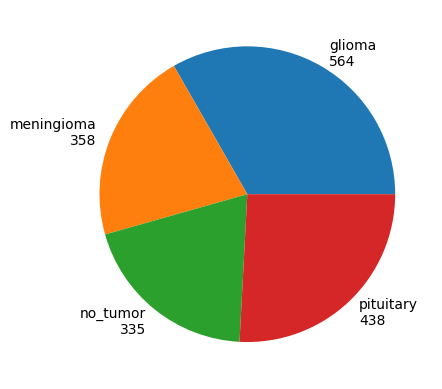

In [10]:
# Chart - 1 visualization code
#Pie chart of the training dataset class distribution
root_dir = "Tumour/train"  # Root dir
classes = os.listdir(root_dir)  # All the class names

# Getting the total number of images in each class
count = []
for class_name in classes:
    class_path = os.path.join(root_dir, class_name)
    if os.path.isdir(class_path):
        total = 0
        for root, dirs, files in os.walk(class_path):
            for file in files:
                if file.endswith(('.jpg', '.png')):
                    total+=1
        count.append(total)

req_labels = ["glioma", "meningioma", "no_tumor", "pituitary"]
labels = []

for i in range(len(count)):
    labels.append(req_labels[i]+"\n"+str(count[i]))

plt.pie(count, labels = labels)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

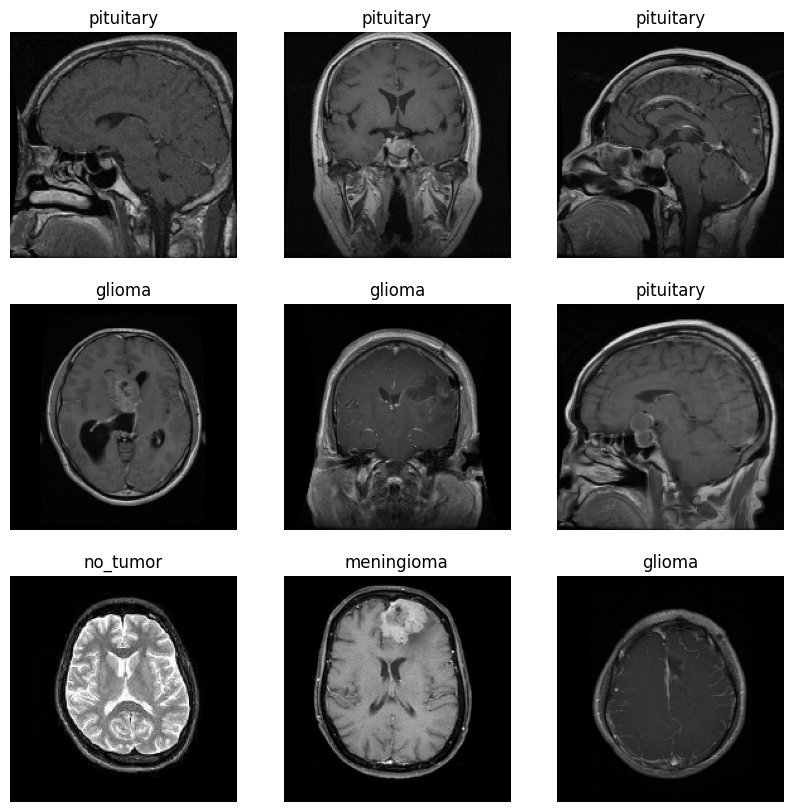

In [11]:
# Chart - 2 visualization code
# Visualizing some images
plt.figure(figsize=(10,10))
for images, labels in train_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

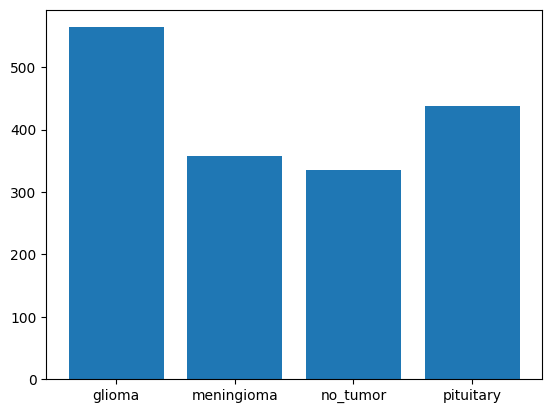

In [12]:
# Chart - 3 visualization code
# Bar chart of Image counts per class
plt.bar(req_labels, count)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

In [13]:
# Chart - 4 visualization code
# Pixel Value Histogram for each class in Training Dataset
# root_dir & classes was defined above

# Dict to hold the pixel values for each class
pixel_data_by_class = {cls: [] for cls in classes}

# Looping over each class folder
for cls in classes:
    class_folder = os.path.join(root_dir, cls)
    
    if not os.path.isdir(class_folder):
        continue
    
    for file in os.listdir(class_folder):
        if file.endswith(('.jpg', '.png', '.jpeg')):
            file_path = os.path.join(class_folder, file)
            
            try:
                # Opening the image and converting it to grayscale ('L' mode)
                img = PIL.Image.open(file_path).convert("L").resize((128,128))  # 'L' mode -> 8-bit pixels, b&w
                
                # Converting image to a NumPy array and flattening to 1D list of pixel values
                pixels = np.array(img).flatten()  # shape becomes (width * height,)
                
                # Adding pixel values to the corresponding class
                pixel_data_by_class[cls].extend(pixels)
                
            except Exception as e:
                print(f"Error reading {file_path}: {e}")

c:\Users\ADMIN\AppData\Local\Programs\Python\Python310\lib\site-packages\numpy\lib\_histograms_impl.py:902: RuntimeWarning: invalid value encountered in divide
  return n/db/n.sum(), bin_edges


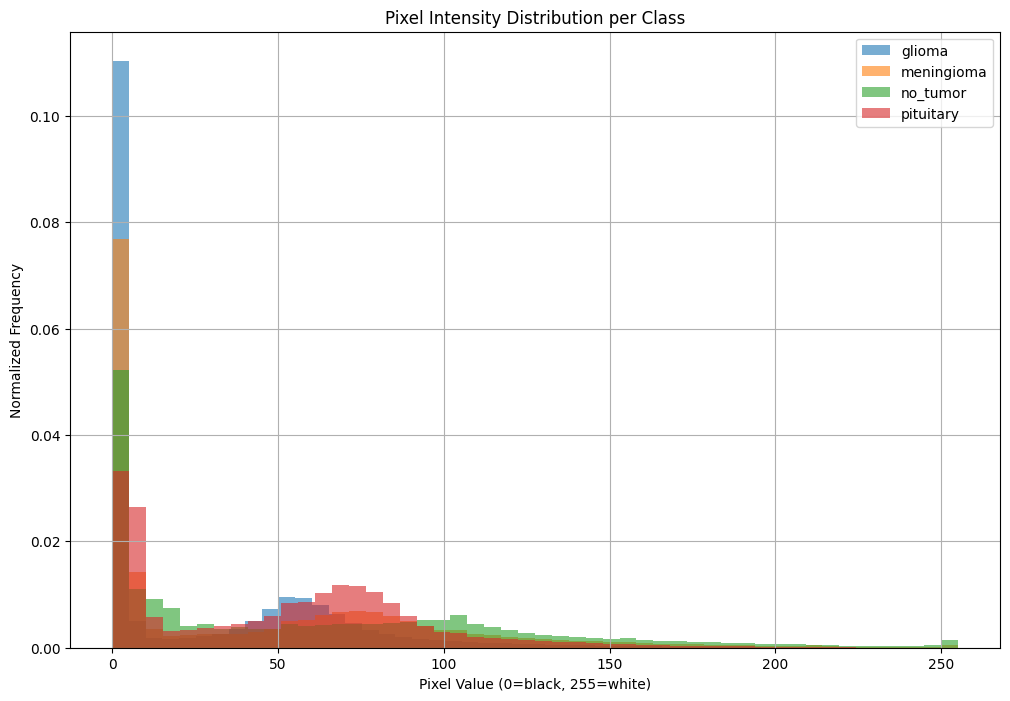

In [14]:
# Plotting the Histogram
plt.figure(figsize=(12, 8))

# Loop through each class and plot
for cls in classes:
    pixels = pixel_data_by_class[cls]
    
    # Normalize histogram by density so we can compare between classes
    plt.hist(pixels, bins=50, alpha=0.6, label=cls, density=True)

    # Density: makes hist comparable even with unequal image count; 
    # alpha: Makes hist slightly transparent for overlap

plt.title("Pixel Intensity Distribution per Class")
plt.xlabel("Pixel Value (0=black, 255=white)")
plt.ylabel("Normalized Frequency")
plt.legend()
plt.grid(True)
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.:

1. H0 (null): There is no significant difference in mean pixel intensity between tumor classes.
2. H1 (alt): At least one class has a significantly different pixel intensity distribution.

#### 2. Perform an appropriate statistical test.

In [15]:
# Perform Statistical Test to obtain P-Value
# Using ANNOVA
class_list = list(pixel_data_by_class.keys())

for i in range(len(class_list)):
    for j in range(i+1, len(class_list)):
        class1 = class_list[i]
        class2 = class_list[j]
        data1 = pixel_data_by_class[class1]
        data2 = pixel_data_by_class[class2]
        
        F_statistic, p_value = stats.f_oneway(data1, data2)
        
        print(f"Comparing {class1} and {class2}: ")
        print(f"F-statistic: {F_statistic}\nP-value: {p_value}")

Comparing glioma and meningioma: 
F-statistic: 637616.6449474358
P-value: 0.0
Comparing glioma and no_tumor: 
F-statistic: 1557611.1553427004
P-value: 0.0
Comparing glioma and pituitary: 
F-statistic: 1361488.1764053395
P-value: 0.0
Comparing glioma and _classes.csv: 
F-statistic: nan
P-value: nan


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_23360\2211120084.py:12: SmallSampleWarning: One or more sample arguments is too small; all returned values will be NaN. See documentation for sample size requirements.
  F_statistic, p_value = stats.f_oneway(data1, data2)


Comparing meningioma and no_tumor: 
F-statistic: 154754.46545478958
P-value: 0.0
Comparing meningioma and pituitary: 
F-statistic: 26867.904760711535
P-value: 0.0
Comparing meningioma and _classes.csv: 
F-statistic: nan
P-value: nan
Comparing no_tumor and pituitary: 
F-statistic: 96008.7393834829
P-value: 0.0
Comparing no_tumor and _classes.csv: 
F-statistic: nan
P-value: nan
Comparing pituitary and _classes.csv: 
F-statistic: nan
P-value: nan


##### Which statistical test have you done to obtain P-Value?

Answer Here.:

-> I have done ANNOVA test here and we reject the H0 here.

##### Why did you choose the specific statistical test?

Answer Here.:

-> It is good for comparing the means of multiple classes. In our case it helped us compare the different pixel intensities across different tumor classes.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.:

1. H0: There is no Class imbalance in the dataset.
2. H1: There is a Class imbalance in the dataset.

#### 2. Perform an appropriate statistical test.

In [17]:
# Perform Statistical Test to obtain P-Value
# Chi squared test
observed_counts = [567, 358, 335,438]

total_count = sum(observed_counts)
expected_per = [0.25, 0.25, 0.25, 0.25]
expected_count = total_count*expected_per

chi2_stat, p_value, _, _ = stats.chi2_contingency(observed_counts, expected_count)
print(f"Chi-Squared Statistic: {chi2_stat}\nP-Value: {p_value}")

Chi-Squared Statistic: 0.0
P-Value: 1.0


##### Which statistical test have you done to obtain P-Value?

Answer Here.:
-> We used Chi-Squared test for this and here we accept the H0.

##### Why did you choose the specific statistical test?

Answer Here.:

-> It is good to compare the distribution of classes as we needed to check if the classes are imbalanced; other tests like t-test or ANOVA compare means between group which is not useful here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.:

1. H0: Augmented data does not improve validation accuracy.
2. H1: Augmented data improves generalization on unseen validation data.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value


##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***